# Serial Handling

In [173]:
import os
import time
from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
from sciopy import GetFirmwareIDs, StartStopMeasurement, SystemMessageCallback, del_hex_in_list, reshape_measurement_buffer
from sciopy.com_handling import available_serial_ports, connect_COM_port

In [143]:
available_serial_ports()

['COM1', 'COM3']

In [140]:
ser = connect_COM_port("COM3", timeout=1)

Connection to COM3 is established.


In [6]:
GetFirmwareIDs(ser)

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0xd2', '0x1e', '0x1', '0x11', '0x0', '0x19', '0x0', '0xb', '0x40', '0x0', '0x9', '0x0', '0x25', '0x2', '0xc9', '0x0', '0xf', '0x1', '0x11', '0x0', '0x19', '0x0', '0xb', '0x40', '0x0', '0x9', '0x0', '0x25', '0x2', '0xc9', '0x0', '0xf', '0xd2', '0x18', '0x1', '0x83', '0x18']
message length:	 37


In [7]:
from sciopy.default_configurations import configuration_01

In [9]:
configuration_01(ser)  # tbd in ender gui
SystemMessageCallback(ser)  # tbd: repeat or print one time the acknowlegement

Command-Acknowledge: Command has been executed successfully
message buffer:
 ['0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', '0x18', '0x18', '0x1', '0x83', 

# Burst count  > 1 splitting

In [179]:
def reduce_burst_to_less_x(
    brst_cnt: Union[int, list], leq: int = 100
) -> Union[List[int], int]:
    """TBD"""
    if type(brst_cnt) == list and brst_cnt[-1] > leq:
        rst = brst_cnt[-1] - leq
        brst_cnt[-1] = leq
        brst_cnt.append(rst)
        reduce_burst_to_leq_x(brst_cnt, leq)
    if type(brst_cnt) == int and brst_cnt > leq:
        brst_cnt = [leq, brst_cnt - leq]
        reduce_burst_to_leq_x(brst_cnt, leq)
    return brst_cnt

def reshape_burst_measurement_buffer(lst: list, burst_count: int)-> List[np.ndarray]:
    """ Does the job of "reshape_measurement_buffer()" but in a burst count scaleable way """
    returning = []
    if burst_count == 1:
        return [reshape_measurement_buffer(lst)]
    else:
        pass
        

In [180]:
tmp_1 = np.load("wrkbnch_data/brstcnt_1.npz", allow_pickle=True)
tmp_2 = np.load("wrkbnch_data/brstcnt_2.npz", allow_pickle=True)
tmp_10 = np.load("wrkbnch_data/brstcnt_10.npz", allow_pickle=True)

tmp_gui = np.load("wrkbnch_data/gui_brstcnt_1.npz", allow_pickle=True)

In [181]:
tmp_1.files

['measurement_data_hex', 'total_time', 'msg_len']

In [182]:
tmp_gui.files

['measurement_data_hex', 'total_time', 'msg_len']

In [183]:
print(tmp_1["msg_len"])
print(tmp_2["msg_len"])
print(tmp_10["msg_len"])

17924
35844
179204


In [212]:
idx_b4_1 = [i for i, ele in enumerate(del_hex_in_list(tmp_1["measurement_data_hex"].tolist())) if ele == "b4"]
idx_b4_2 = [i for i, ele in enumerate(del_hex_in_list(tmp_2["measurement_data_hex"].tolist())) if ele == "b4"]
idx_b4_10 = [i for i, ele in enumerate(del_hex_in_list(tmp_10["measurement_data_hex"].tolist())) if ele == "b4"]

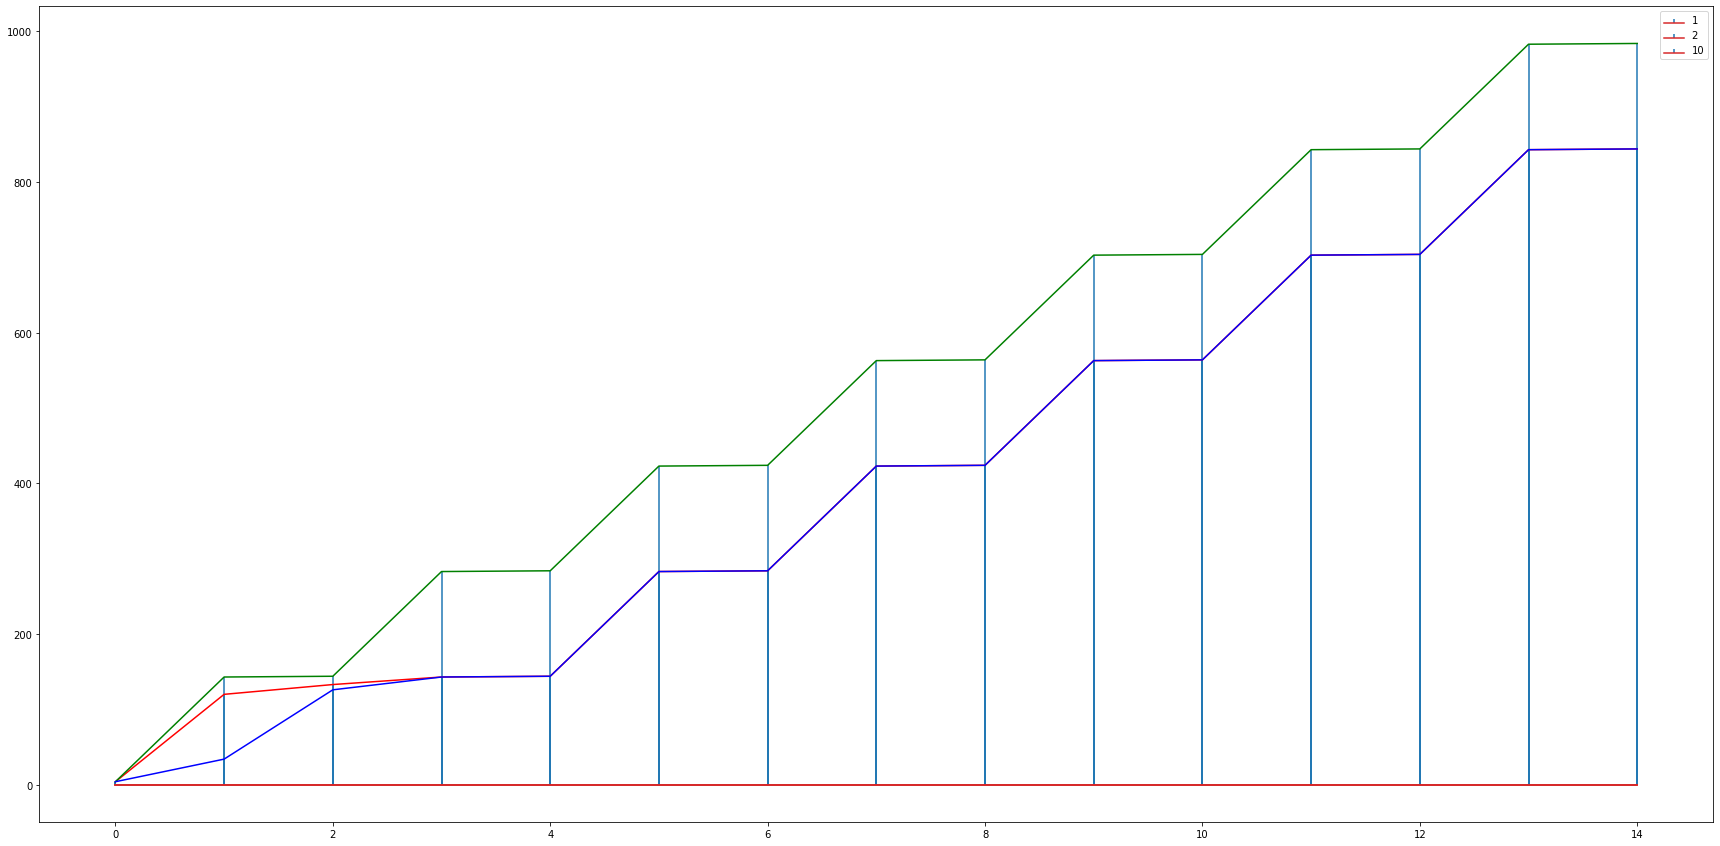

In [230]:
plt.figure(figsize=(30,15))
plt.stem(idx_b4_1[:15], label="1", markerfmt='r',linefmt="*")
plt.stem(idx_b4_2[:15], label="2", markerfmt='g')
plt.stem(idx_b4_10[:15], label="10", markerfmt='b')
plt.legend()

In [234]:
print(idx_b4_1[:10])
print(idx_b4_2[:10])
print(idx_b4_10[:10])

[4, 120, 133, 143, 144, 283, 284, 423, 424, 563]
[4, 143, 144, 283, 284, 423, 424, 563, 564, 703]
[4, 34, 126, 143, 144, 283, 284, 423, 424, 563]


In [237]:
# Alles durchmessen

10

In [233]:
print(tmp_1["measurement_data_hex"].tolist()[3:10])
print(tmp_10["measurement_data_hex"].tolist()[3:10])

['0x18', '0xb4', '0x89', '0x1', '0x1', '0x2', '0x0']
['0x18', '0xb4', '0x89', '0x1', '0x1', '0x2', '0x0']


# Hexcallback

In [1]:
import struct
from dataclasses import dataclass
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def del_hex_in_list(lst: list) -> list:
    return [
        "0" + ele.replace("0x", "") if len(ele) == 1 else ele.replace("0x", "")
        for ele in lst
    ]


def bytesarray_to_float(bytes_array: np.ndarray) -> float:
    bytes_array = [int(b, 16) for b in bytes_array]
    bytes_array = bytes(bytes_array)
    return struct.unpack("!f", bytes(bytes_array))[0]


def bytesarray_to_int(bytes_array: np.ndarray) -> int:
    bytes_array = bytesarray_to_byteslist(bytes_array)
    return int.from_bytes(bytes_array, "big")


def bytesarray_to_byteslist(bytes_array: np.ndarray) -> list:
    bytes_array = [int(b, 16) for b in bytes_array]
    return bytes(bytes_array)


def reshape_measurement_buffer(lst: list) -> np.ndarray:
    idx_b4 = [i for i, ele in enumerate(lst) if ele == "b4"]
    idx_b4 = np.array(idx_b4)
    step = abs(idx_b4[1] - idx_b4[0]) + 1
    return np.array(
        [lst[i : i + step] for i in range(idx_b4[0], idx_b4[-1] + step, step)],
        dtype=list,
    )[:-1]


@dataclass
class BaseSettingForEstimation:
    active_channel_groups: np.ndarray
    burst_count: int


@dataclass
class SingleFrame:
    start_tag: List[str]
    channel_group: str
    excitation_stgs: List[str]
    frequency_row: List[str]
    timestamp: int  # [ms]
    ch_1: complex
    ch_2: complex
    ch_3: complex
    ch_4: complex
    ch_5: complex
    ch_6: complex
    ch_7: complex
    ch_8: complex
    ch_9: complex
    ch_10: complex
    ch_11: complex
    ch_12: complex
    ch_13: complex
    ch_14: complex
    ch_15: complex
    ch_16: complex
    end_tag: str


def parse_single_frame(lst_ele: np.ndarray) -> SingleFrame:
    channels = {}
    enum = 0
    for i in range(11, 135, 8):
        enum += 1
        channels[f"ch_{enum}"] = complex(
            bytesarray_to_float(lst_ele[i : i + 4]),
            bytesarray_to_float(lst_ele[i + 4 : i + 8]),
        )

    excitation_stgs = np.array([ele for ele in lst_ele[3:5]])

    sgl_frm = SingleFrame(
        start_tag=lst_ele[0],
        channel_group=int(lst_ele[2]),
        excitation_stgs=excitation_stgs,
        frequency_row=lst_ele[5:7],
        timestamp=bytesarray_to_int(lst_ele[7:11]),
        **channels,
        end_tag=lst_ele[139],
    )
    return sgl_frm

In [3]:
# base_stgs_for_est = BaseSettingForEstimation(np.array([1]), 1)
# base_stgs_for_est
from sciopy.sciopy_dataclasses import ScioSpecMeasurementConfig

In [4]:
measurement_data = np.load("tmp_data/sample_000000.npz", allow_pickle=True)
measurement_data.files

['config', 'data', 'enderstat', 'circledrivepattern', 'kartesiandrivepattern']

In [11]:
# measurement_data['data'][0]

In [13]:
parse_single_frame(measurement_data["data"][0])

SingleFrame(start_tag='b4', channel_group=1, excitation_stgs=array(['1', '2'], dtype='<U1'), frequency_row=['0', '0'], timestamp=0, ch_1=(1.2251087427139282-0.3391319215297699j), ch_2=(-1.224099040031433+0.3421427309513092j), ch_3=(-0.06761793792247772-0.06170428544282913j), ch_4=(-0.008094284683465958-0.009728801436722279j), ch_5=(0.000978139229118824-4.024095323984511e-05j), ch_6=(3.0159530069795437e-05-0.00040526792872697115j), ch_7=(0.00041833764407783747+4.4160933612147346e-05j), ch_8=(-0.00011541175626916811-0.0005447313887998462j), ch_9=(-0.0007664732984267175-0.0011936132796108723j), ch_10=(0.0006124393548816442+0.0002588862262200564j), ch_11=(-0.000496247666887939-0.00100342882797122j), ch_12=(0.0005513371434062719+3.0604478524765e-05j), ch_13=(-0.0010232159402221441-0.0014807317638769746j), ch_14=(-0.00011219223233638331-0.0005662826588377357j), ch_15=(0.0008729307446628809+0.0005239679594524205j), ch_16=(0.001715516671538353+0.0013162072282284498j), end_tag='b4')

In [28]:
def parse_to_full_frame(measurement_data: np.ndarray) -> np.ndarray:
    """Parses any measured byte representation into the dataclass SingleFrame"""
    data_frame = []
    for i, sf in enumerate(measurement_data):
        data_frame.append(parse_single_frame(sf))
    return np.array(data_frame)

In [29]:
parse_to_full_frame?

Signature: parse_to_full_frame(measurement_data: numpy.ndarray) -> numpy.ndarray
Docstring: <no docstring>
File:      c:\users\sciospeceit\appdata\local\temp\ipykernel_3516\1481531900.py
Type:      function


In [33]:
type(parse_to_full_frame(measurement_data["data"])[0])

__main__.SingleFrame

In [7]:
def get_channel_group_img(reshaped_measurement_buffer: np.ndarray, channel_group: int):
    img = np.empty((0, 16))
    for i, sf in enumerate(reshaped_measurement_buffer):
        tmp_f = parse_single_frame(sf)
        if tmp_f.channel_group == channel_group:
            tmp_f = tmp_f.__dict__
            tmp_row = np.array([tmp_f[f"ch_{ch_n}"] for ch_n in range(1, 17)])
            img = np.vstack((img, abs(tmp_row)))
    img = np.delete(np.matrix(img), 0, axis=0)
    print("Shape:", img.shape)
    return img

In [8]:
plt.imshow(get_channel_group_img(measurement_data, 1))

error: unpack requires a buffer of 4 bytes

# Save data to pickle

In [25]:
import os
import pickle
from typing import Union

from ender_sciospec_classes import CircleDrivePattern, KartesianDrivePattern
from sciopy.sciopy_dataclasses import ScioSpecMeasurementConfig


def split_pickle_to_classes(
    pkl_data: list,
) -> Union[ScioSpecMeasurementConfig, CircleDrivePattern, KartesianDrivePattern]:

    return pkl_data[0], pkl_data[1], pkl_data[2]

In [ ]:
# os.remove('meas_cnf.pkl')

In [ ]:
with open("meas_cnf.pkl", "rb") as f:
    meas_cnf = pickle.load(f)

In [ ]:
(
    scio_spec_measurement_config,
    circledrivepattern,
    kartesiandrivepattern,
) = split_pickle_to_classes(meas_cnf)

In [ ]:
scio_spec_measurement_config

ScioSpecMeasurementConfig(com_port='COM3', sample_per_step=10, actual_sample=0, s_path='tmp_data/', object='circle')

In [ ]:
circledrivepattern

CircleDrivePattern(active=True, wait_at_pos=1, radius=100, phi_steps=45, abs_x_posis=array([280.        , 250.71067812, 180.        , 109.28932188,
        80.        , 109.28932188, 180.        , 250.71067812]), abs_y_posis=array([180.        , 250.71067812, 280.        , 250.71067812,
       180.        , 109.28932188,  80.        , 109.28932188]), abs_z_posis=0, motion_speed=1500, n_points=0, actual_point=0)

In [ ]:
kartesiandrivepattern

KartesianDrivePattern(active=False, wait_at_pos=1, motion_speed=1500, x_start=160, y_start=160, x_stop=180, y_stop=180, x_stp_num=10, y_stp_num=10, abs_x_posis=array([0.]), abs_y_posis=array([0.]), abs_z_posis=array([0.]), n_points=0, actual_point=0)

In [ ]:
import time

# Control saved data

In [2]:
import numpy as np

measurement_data = np.load("tmp_data/sample_000000.npz", allow_pickle=True)
measurement_data.files

['config', 'data', 'enderstat', 'circledrivepattern', 'kartesiandrivepattern']